In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../Downloads/shampoo.csv")
df.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


In [7]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


<AxesSubplot:>

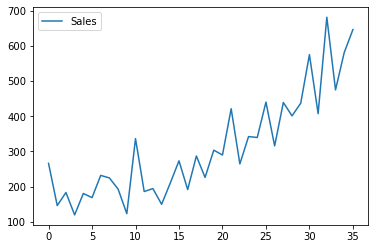

In [10]:
df.plot()

## Checking the stationarity

In [22]:
def checkStationarity(df):
    from statsmodels.tsa.stattools import adfuller
    res = adfuller(df)
    p_val = res[1]
    if p_val>0.05:
        print("Not Stationary")
    else:
        print("Stationary")

In [23]:
checkStationarity(df.Sales)

Not Stationary


In [24]:
checkStationarity(df["Sales"].diff().dropna())

Stationary


Text(0.5, 1.0, '2nd Differencing')

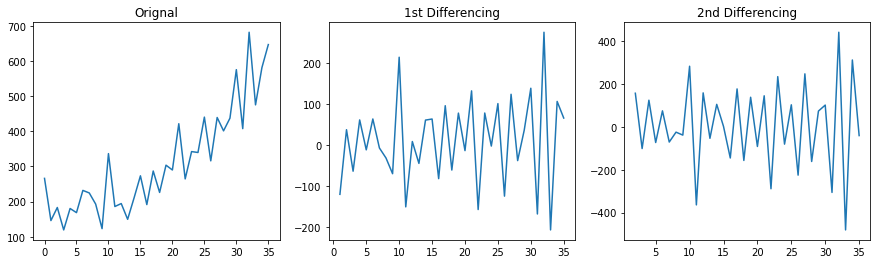

In [29]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
plt.plot(df["Sales"])
plt.title("Orignal")
plt.subplot(1,3,2)
plt.plot(df["Sales"].diff())
plt.title("1st Differencing")
plt.subplot(1,3,3)
plt.plot(df["Sales"].diff().diff())
plt.title("2nd Differencing")

In [30]:
#d=1, 2

### Finding value of P

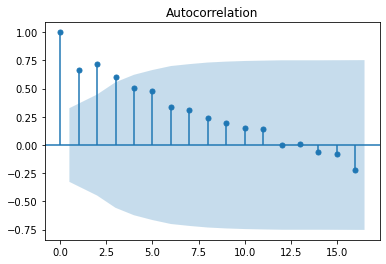

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(df.Sales)

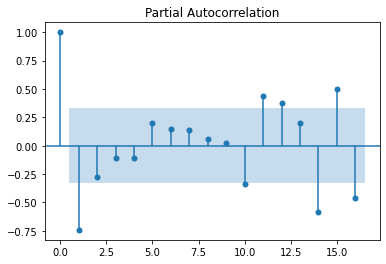

In [34]:
fig = plot_pacf(df.Sales.diff().dropna())

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


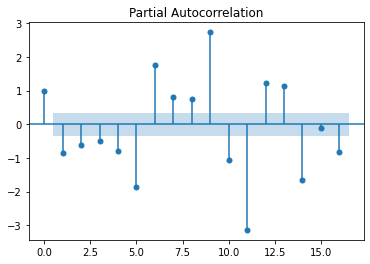

In [35]:
fig = plot_pacf(df.Sales.diff().diff().dropna())

### Finding Q

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

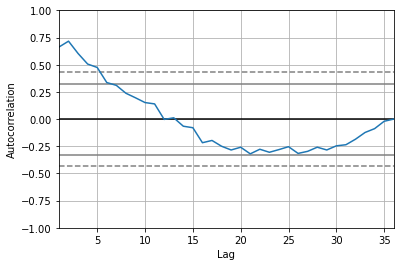

In [36]:
pd.plotting.autocorrelation_plot(df.Sales)

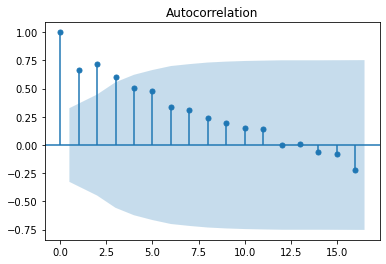

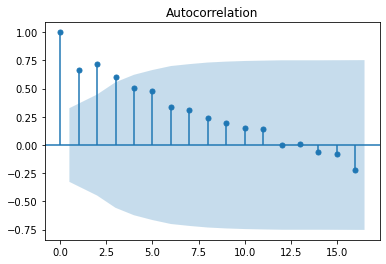

In [41]:
plot_acf(df.Sales)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
x = df.Sales
model = ARIMA(x, order = (1, 1, 1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Thu, 01 Jul 2021   AIC                            402.467
Time:                        16:01:24   BIC                            408.688
Sample:                             1   HQIC                           404.614
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

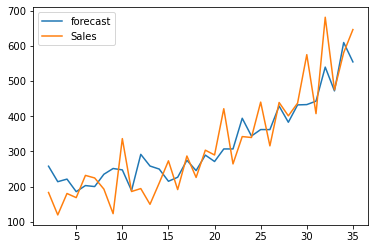

In [40]:
model_fit.plot_predict()
plt.show()